In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy import units as u

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

In [3]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

In [4]:
c=3e8*u.m/u.s
lam=6e-2*u.m

In [5]:
th_0=(15*u.deg).to(u.rad)

In [6]:
b=30*u.m

In [7]:
res_int=(lam/b)*u.rad
res_int

<Quantity 0.002 rad>

In [8]:
fov=lam/(5*u.m)*u.rad
fov

<Quantity 0.012 rad>

In [33]:
omega=2*np.pi*u.rad/(24*u.h)

In [37]:
(fov/omega).to(u.s)

<Quantity 165.011845 s>

In [9]:
n_fringes=int(fov/res_int)
n_fringes

6

In [10]:
theta=np.linspace(th_0-fov/2,th_0+fov/2,100*n_fringes)

In [11]:
theta

<Quantity [0.25579939,0.25581942,0.25583945,0.25585949,0.25587952,
           0.25589955,0.25591959,0.25593962,0.25595965,0.25597969,
           0.25599972,0.25601976,0.25603979,0.25605982,0.25607986,
           0.25609989,0.25611992,0.25613996,0.25615999,0.25618002,
           0.25620006,0.25622009,0.25624012,0.25626016,0.25628019,
           0.25630022,0.25632026,0.25634029,0.25636032,0.25638036,
           0.25640039,0.25642042,0.25644046,0.25646049,0.25648052,
           0.25650056,0.25652059,0.25654062,0.25656066,0.25658069,
           0.25660072,0.25662076,0.25664079,0.25666082,0.25668086,
           0.25670089,0.25672092,0.25674096,0.25676099,0.25678102,
           0.25680106,0.25682109,0.25684112,0.25686116,0.25688119,
           0.25690122,0.25692126,0.25694129,0.25696132,0.25698136,
           0.25700139,0.25702142,0.25704146,0.25706149,0.25708152,
           0.25710156,0.25712159,0.25714162,0.25716166,0.25718169,
           0.25720173,0.25722176,0.25724179,0.25726183,0.25728

In [12]:
#sqap=np.zeros(len(theta))
#sqap[len(theta)//4:3*len(theta)//4]=1

In [13]:
#plt.plot(theta,sqap)

In [14]:
#apfft=np.fft.fft(sqap)

In [15]:
r_c=np.cos(2*np.pi*u.rad*(b/lam)*np.sin(theta))

In [16]:
def sq_source(time,theta,width):
    aaa=np.zeros(len(theta))
    if time < width: 
        aaa[0:time]=1
    if time >=width:
        aaa[time-width:time]=1
    myfft=(np.fft.fft(aaa))
#    flux=(np.abs(np.fft.ifft(myfft*apfft)).sum())*(theta[1]-theta[0]).value
    return aaa,myfft#,flux

In [17]:
#aaa,myfft,flux=sq_source(120,theta,width)

In [18]:
#plt.figure(figsize=(3,2))
#aaa,myfft,flux=sq_source(190,theta,width)
#plt.plot(np.abs(np.fft.ifft(myfft*apfft))[::-1])
#plt.plot(100*aaa)
#plt.plot(100*sqap)

In [25]:
width=140

In [40]:
spfreq=np.fft.fftfreq(len(theta), d=theta[1]-theta[0])
response=[]
timef=800
tscale=((fov/omega)*timef/len(theta)).to(u.s)

for time in range(timef):
    aaa,myfft=sq_source(time,theta,width)
    intfft=(np.fft.fft(0.5*(width/len(theta))**2*r_c))
    res=np.abs(np.fft.ifft(intfft*myfft))[100*n_fringes//2]
    response+=[res]

In [41]:
tscale

<Quantity 220.01579333 s>

In [56]:
time=40
def plot_r(time,theta,r_c,width,timef):

    aaa,myfft=sq_source(time,theta,width)
    intfft=(np.fft.fft(0.5*(width/len(theta))**2*r_c))
    timear=np.arange(timef)
    image=np.abs(np.fft.ifft(intfft*myfft))
    fig, ax = plt.subplots(2, 3,figsize=(15,5))
    ax[0,0].plot(theta,aaa)
#    ax[0,0].plot(theta,sqap,c='r')
    ax[0,0].set_xlabel(r'$\theta$ (rad)')
    ax[0,0].set_ylabel(r'$I_\nu$ (arb. units)')
    ax[0,0].set_title('Source in FOV')

    ax[0,1].plot(theta,0.5*(width/len(theta))**2*r_c)
    ax[0,1].set_xlabel(r'$\theta$ (rad)')
    ax[0,1].set_ylabel(r'$R_C$')
    ax[0,1].set_title('Interferometer sky response')

    ax[0,2].plot(spfreq,np.abs(myfft))
    ax[0,2].axvline(b/lam,c='r')
    ax[0,2].set_xlim(0,10*b/lam)
    ax[0,2].set_title('FT of source profile')
    ax[0,2].set_xlabel(r'Spatial frequencies (rad$^{-1}$)')

    ax[1,0].plot(spfreq,np.abs(intfft))
    ax[1,0].axvline(b/lam,c='r')
    ax[1,0].set_xlim(0,10*b/lam)
    ax[1,0].set_title('FT of interferometer sky response (u-coverage)')
    ax[1,0].set_xlabel(r'Spatial frequencies (rad$^{-1}$)')

    ax[1,1].plot(theta,image)
    ax[1,1].axvline(theta[100*n_fringes//2].value,c='g')
    ax[1,1].set_title('Interferometer response (snapshot)')
    ax[1,1].set_xlabel(r'$\theta$ (rad)')


    ax[1,2].plot((timear-timef+time)*(tscale.value)/timef,response[::-1],c='g')
    ax[1,2].set_xlim(0,tscale.value)
#    ax[1,2].set_xticks(np.arange(0, tscale.value, step=10))
    ax[1,2].set_xlabel('$t$ (s)')
    ax[1,2].set_title('Interferometer response (recorded at FOV center)')
    
#    ax[2,0].plot()

    plt.tight_layout()
    plt.show()
#    print(flux)
#add single-element response
#add visibility

In [57]:
slider=widgets.IntSlider(min=0, max=timef, step=10, value=0)
interact(plot_r,time=slider,theta=fixed(theta),r_c=fixed(r_c),width=fixed(width),timef=fixed(timef));


interactive(children=(IntSlider(value=0, description='time', max=800, step=10), Output()), _dom_classes=('widg…

In [135]:
theta[100*n_fringes//2].value

0.2618094044936402

In [80]:
response=[]
for time in range(800):
    aaa=np.zeros(len(theta))
    if time < 140: 
        aaa[0:time]=1
    if time >=140:
        aaa[time-140:time]=1
    myfft=(np.fft.fft(aaa))
    res=np.abs(np.fft.ifft(intfft*myfft))[100*n_fringes//2]
    response+=[res]

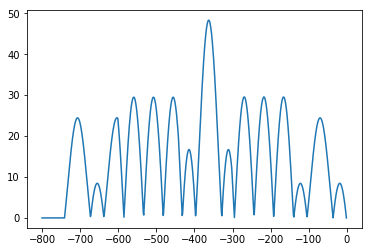

In [85]:
plt.plot(timear-800,response[::-1])

In [ ]:
myfft=(np.fft.fft(aaa))
timear=np.arange(800)
image=np.abs(np.fft.ifft(intfft*myfft))

In [39]:
intfft=(np.fft.fft(r_c))

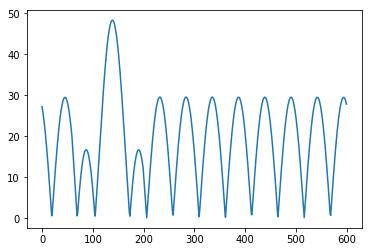

In [40]:
plt.plot(np.abs(np.fft.ifft(intfft*myfft)))

In [41]:
u=b/lam
u

<Quantity 500.>

/Users/germanchaparro/miniconda2/envs/py36/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


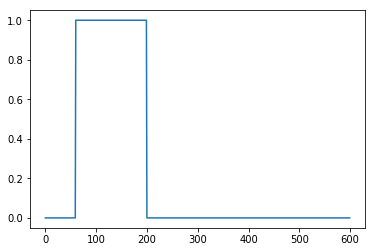

In [42]:
plt.plot(np.fft.ifft(np.fft.fft(aaa)))